### `1. Easy Level: Hill Climbing Algorithm`

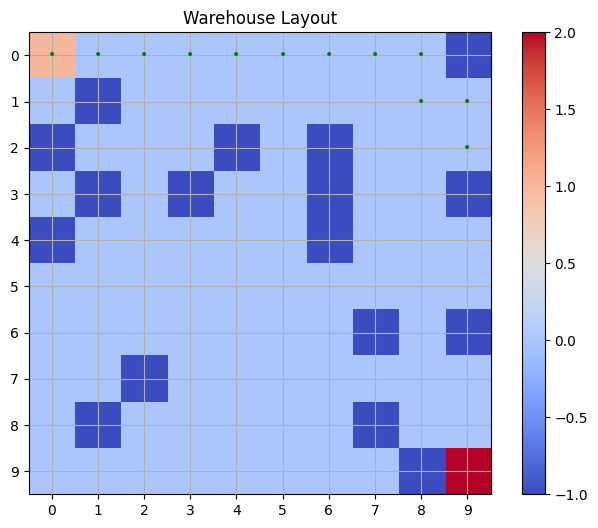

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def generate_warehouse(rows, cols, obstacle_ratio=0.2):
    """Generates a warehouse grid with obstacles."""
    grid = [['.' for _ in range(cols)] for _ in range(rows)]
    num_obstacles = int(rows * cols * obstacle_ratio)
    for _ in range(num_obstacles):
        r, c = random.randint(0, rows-1), random.randint(0, cols-1)
        grid[r][c] = 'X'
    start = (0, 0)
    end = (rows-1, cols-1)
    grid[start[0]][start[1]] = 'S'
    grid[end[0]][end[1]] = 'E'
    return grid, start, end

def visualize_warehouse(grid, path=None):
    """Visualizes the warehouse grid with optional path."""
    plt.figure(figsize=(8, 6))
    rows, cols = len(grid), len(grid[0])
    matrix = np.zeros((rows, cols))
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'X':
                matrix[r][c] = -1  # Obstacles
            elif grid[r][c] == 'S':
                matrix[r][c] = 1  # Start
            elif grid[r][c] == 'E':
                matrix[r][c] = 2  # End

    plt.imshow(matrix, cmap='coolwarm', origin='upper')
    if path:
        for r, c in path:
            plt.text(c, r, '•', ha='center', va='center', color='green')
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(visible=True)
    plt.title("Warehouse Layout")
    plt.colorbar()
    plt.show()

def hill_climbing(grid, start, end):
    current = start
    path = [current]
    while current != end:
        neighbors = get_neighbors(current, grid)
        best_neighbor = min(neighbors, key=lambda n: heuristic(n, end))
        if heuristic(best_neighbor, end) >= heuristic(current, end):  # Local optimum
            break
        current = best_neighbor
        path.append(current)
    return path

def heuristic(pos, goal):
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

def get_neighbors(pos, grid):
    rows, cols = len(grid), len(grid[0])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    neighbors = []
    for dr, dc in directions:
        r, c = pos[0] + dr, pos[1] + dc
        if 0 <= r < rows and 0 <= c < cols and grid[r][c] != 'X':
            neighbors.append((r, c))
    return neighbors

# Generate dynamic warehouse
rows, cols = 10, 10
warehouse, start, end = generate_warehouse(rows, cols)

# Find path using Hill Climbing
path = hill_climbing(warehouse, start, end)

# Visualize the warehouse and path
visualize_warehouse(warehouse, path)


Step 1:


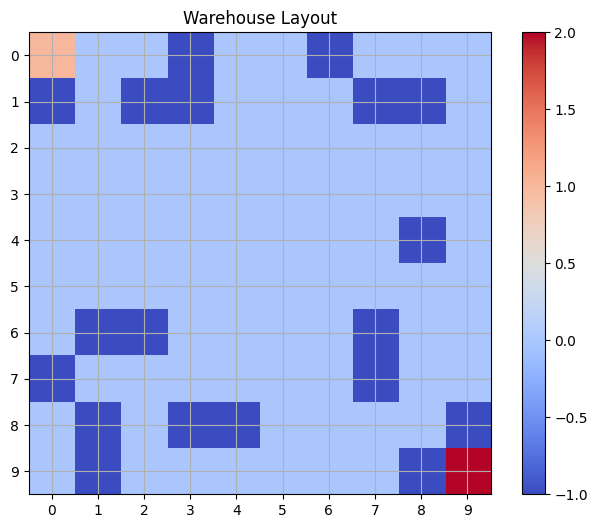

Local optimum reached. Terminating path search.


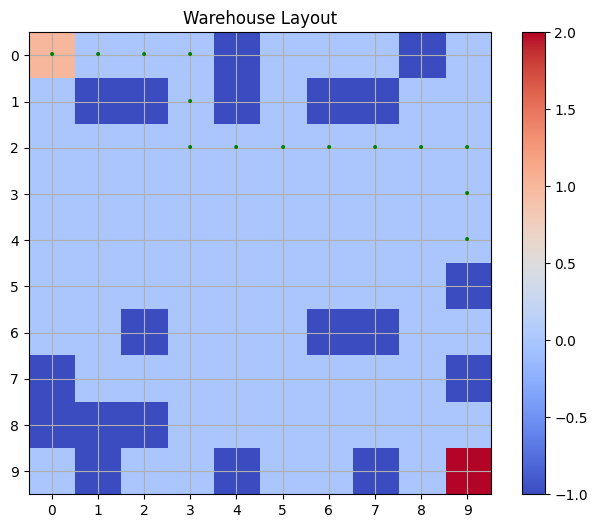

Step 2:


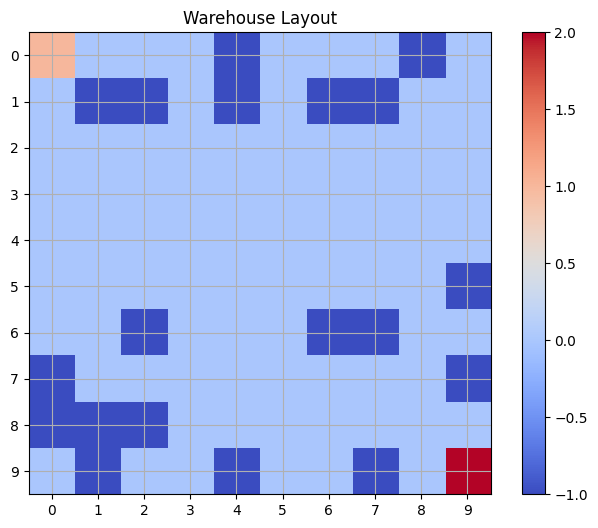

Local optimum reached. Terminating path search.


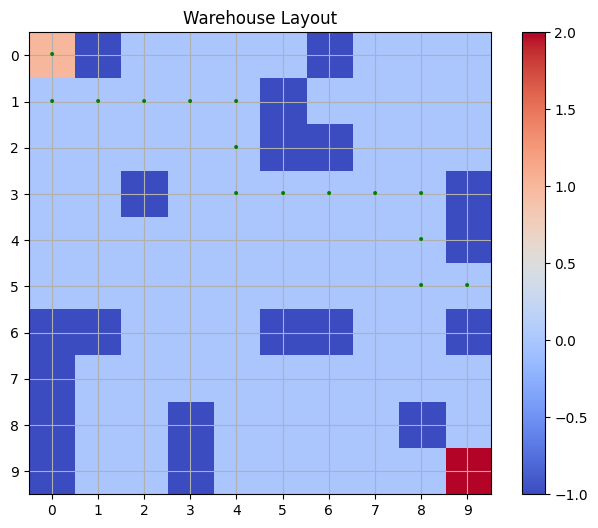

Step 3:


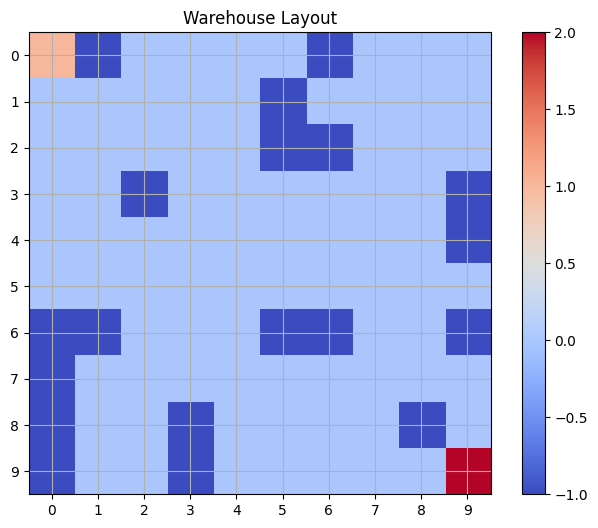

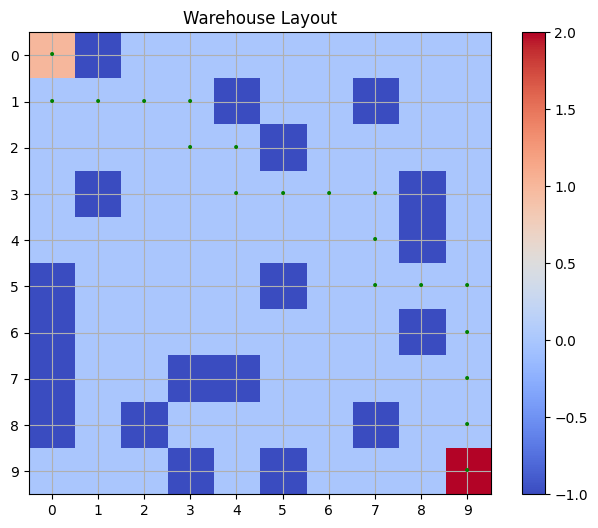

Step 4:


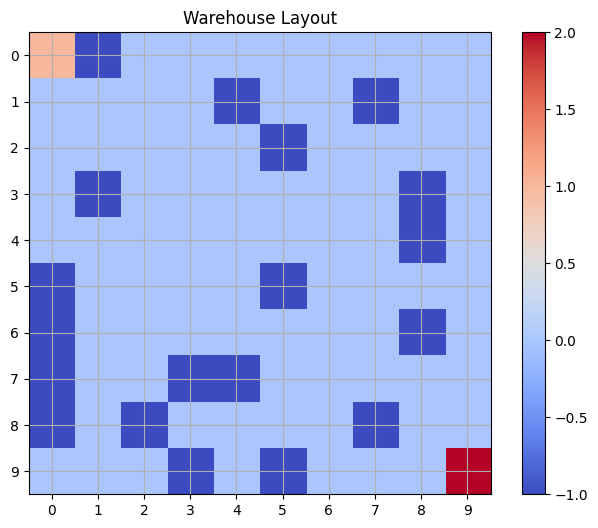

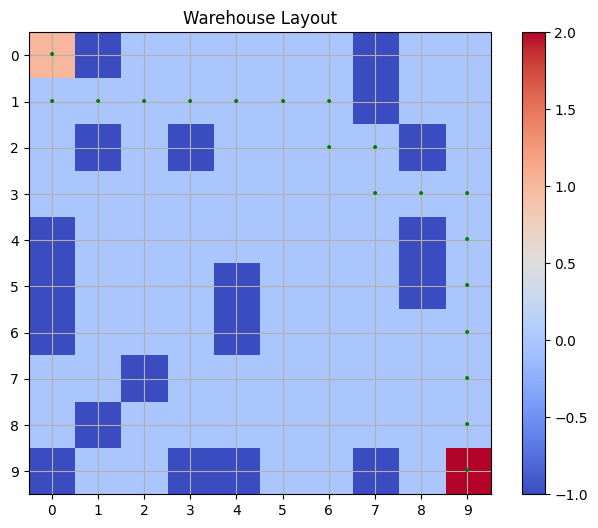

Step 5:


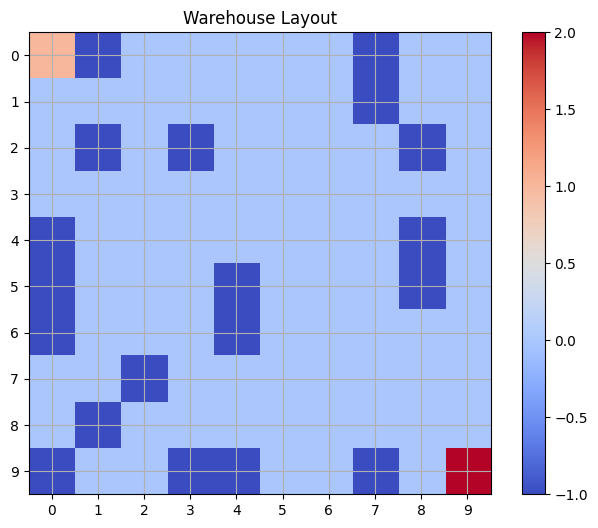

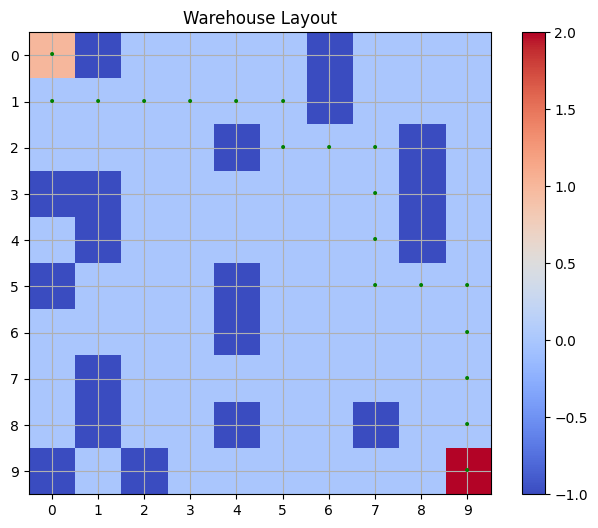

Step 6:


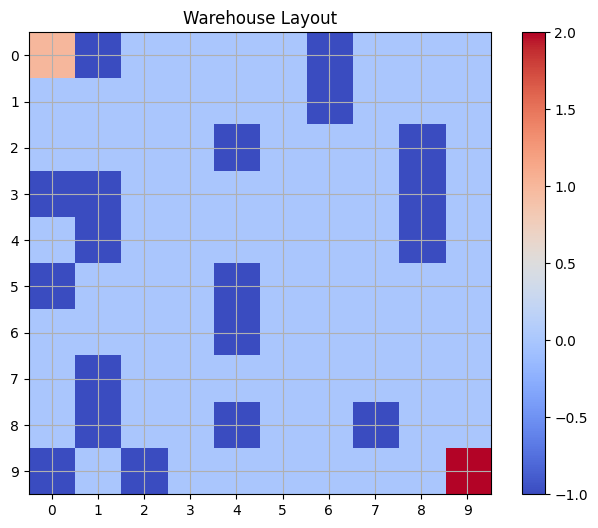

Local optimum reached. Terminating path search.


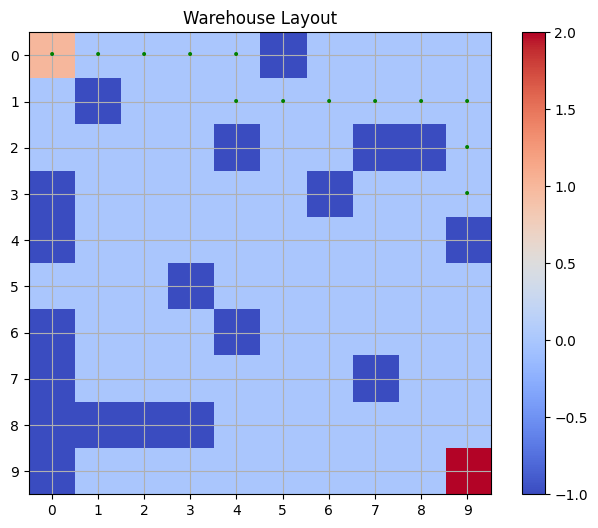

Step 7:


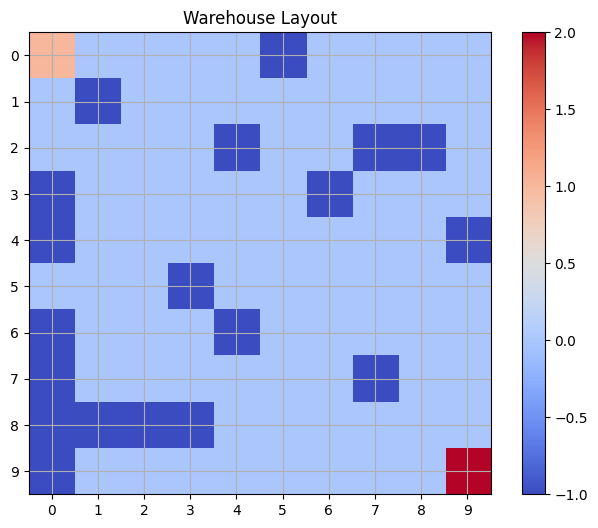

Local optimum reached. Terminating path search.


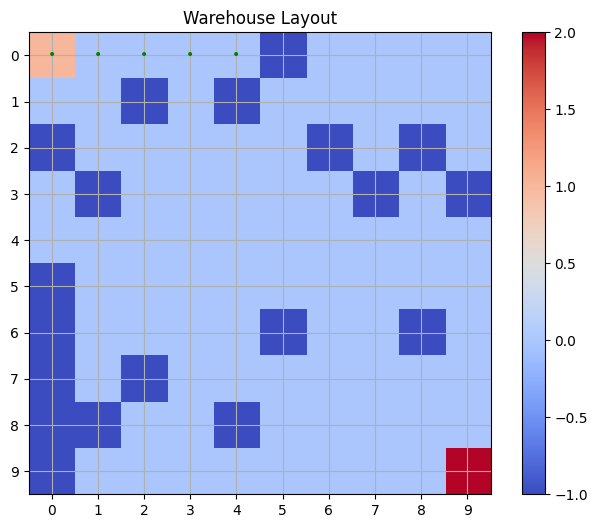

Step 8:


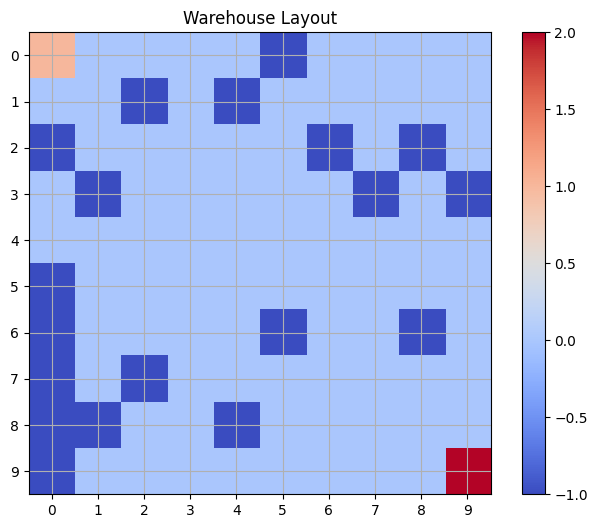

Local optimum reached. Terminating path search.


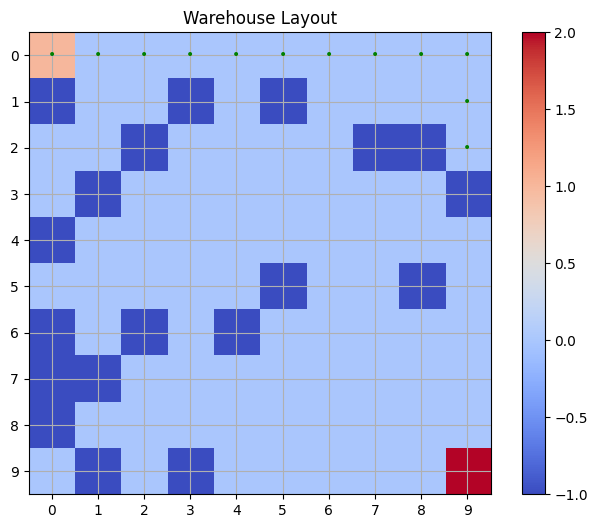

Step 9:


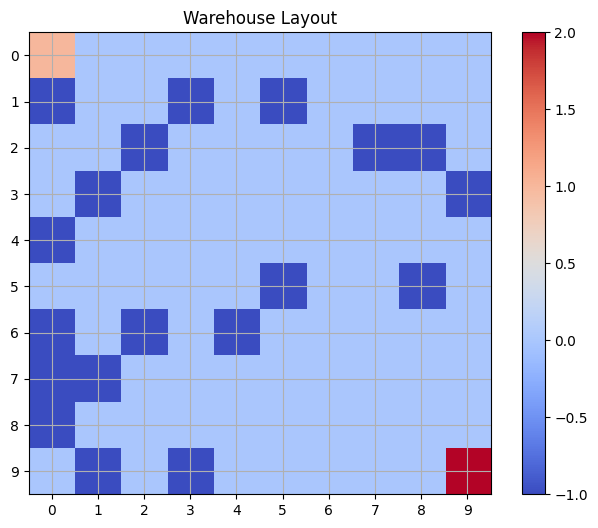

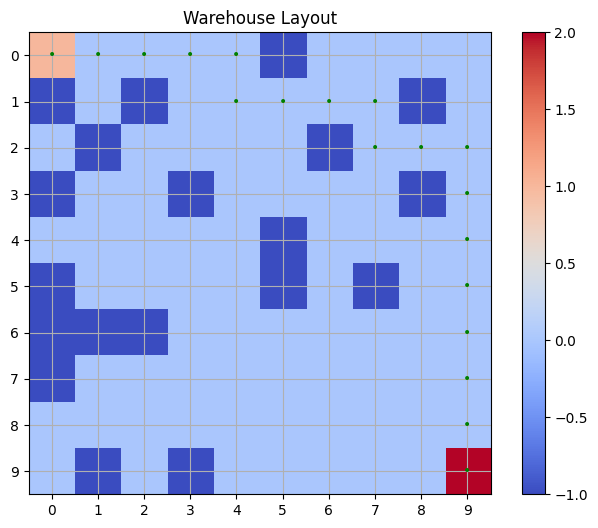

Step 10:


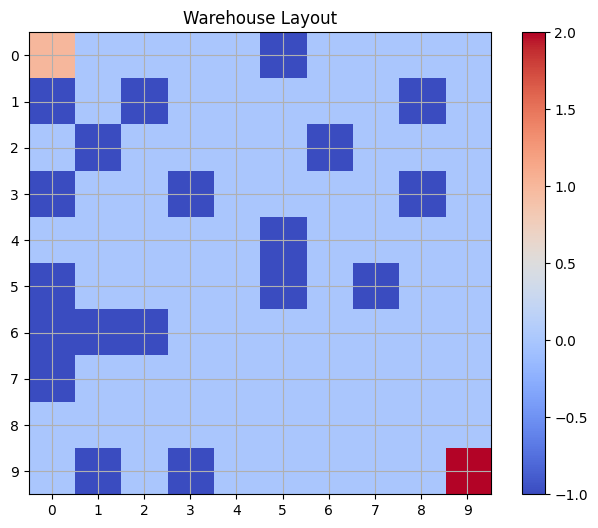

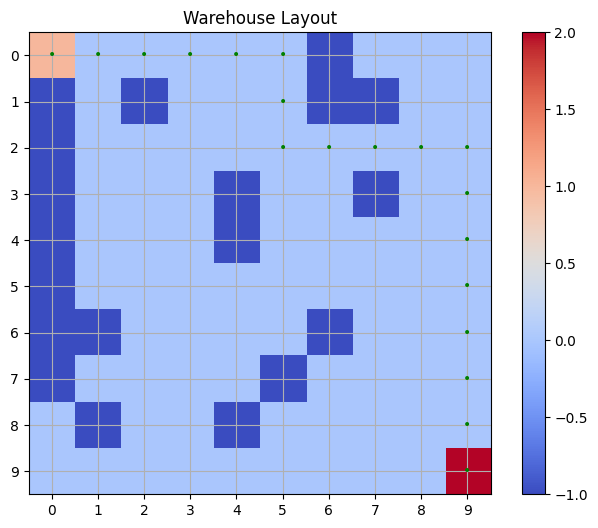

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

def generate_warehouse(rows, cols, obstacle_ratio=0.2):
    """Generates a warehouse grid with obstacles."""
    grid = [['.' for _ in range(cols)] for _ in range(rows)]
    num_obstacles = int(rows * cols * obstacle_ratio)
    for _ in range(num_obstacles):
        r, c = random.randint(0, rows-1), random.randint(0, cols-1)
        grid[r][c] = 'X'
    start = (0, 0)
    end = (rows-1, cols-1)
    grid[start[0]][start[1]] = 'S'
    grid[end[0]][end[1]] = 'E'
    return grid, start, end

def visualize_warehouse(grid, path=None):
    """Visualizes the warehouse grid with optional path."""
    plt.figure(figsize=(8, 6))
    rows, cols = len(grid), len(grid[0])
    matrix = np.zeros((rows, cols))
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'X':
                matrix[r][c] = -1  # Obstacles
            elif grid[r][c] == 'S':
                matrix[r][c] = 1  # Start
            elif grid[r][c] == 'E':
                matrix[r][c] = 2  # End

    plt.imshow(matrix, cmap='coolwarm', origin='upper')
    if path:
        for r, c in path:
            plt.text(c, r, '•', ha='center', va='center', color='green')
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(visible=True)
    plt.title("Warehouse Layout")
    plt.colorbar()
    plt.show()

def hill_climbing(grid, start, end):
    current = start
    path = [current]
    while current != end:
        neighbors = get_neighbors(current, grid)
        if not neighbors:
            print("No valid neighbors found. Terminating path search.")
            break
        best_neighbor = min(neighbors, key=lambda n: heuristic(n, end))
        if heuristic(best_neighbor, end) >= heuristic(current, end):  # Local optimum
            print("Local optimum reached. Terminating path search.")
            break
        current = best_neighbor
        path.append(current)
    return path

def heuristic(pos, goal):
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

def get_neighbors(pos, grid):
    rows, cols = len(grid), len(grid[0])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    neighbors = []
    for dr, dc in directions:
        r, c = pos[0] + dr, pos[1] + dc
        if 0 <= r < rows and 0 <= c < cols and grid[r][c] != 'X':
            neighbors.append((r, c))
    return neighbors

def move_obstacles(grid):
    """Simulates movement of obstacles in the grid."""
    rows, cols = len(grid), len(grid[0])
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'X':
                # Randomly move obstacle to a neighboring cell
                directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
                random.shuffle(directions)
                for dr, dc in directions:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == '.':
                        grid[nr][nc], grid[r][c] = grid[r][c], grid[nr][nc]
                        break

# Generate dynamic warehouse
rows, cols = 10, 10
warehouse, start, end = generate_warehouse(rows, cols)

# Dynamic simulation
for step in range(10):  # Simulate 10 steps
    print(f"Step {step + 1}:")
    visualize_warehouse(warehouse)
    move_obstacles(warehouse)
    path = hill_climbing(warehouse, start, end)  # Recalculate path
    visualize_warehouse(warehouse, path)
    time.sleep(1)  # Pause for visualization


### `2. Medium Level: A* Algorithm`

Step 1:


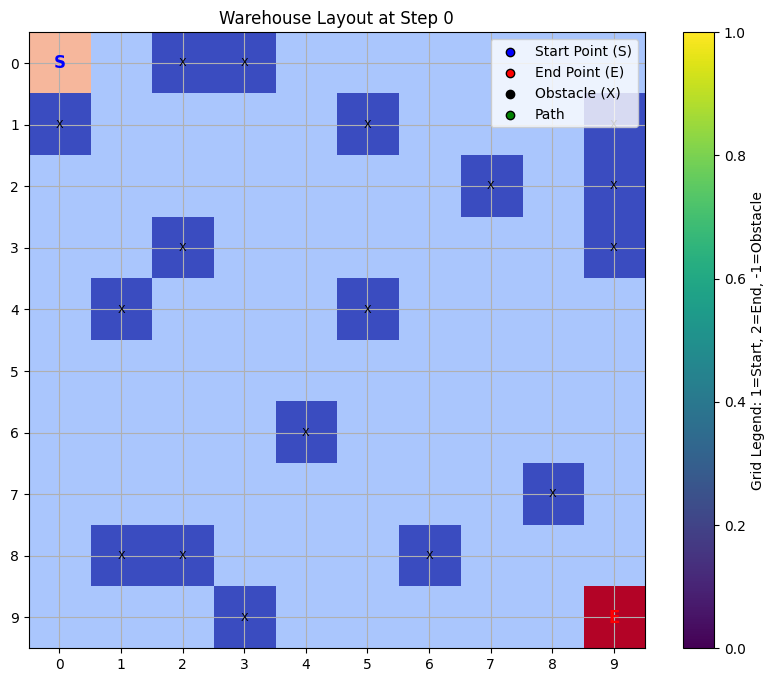

Path: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (3, 7), (3, 8), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


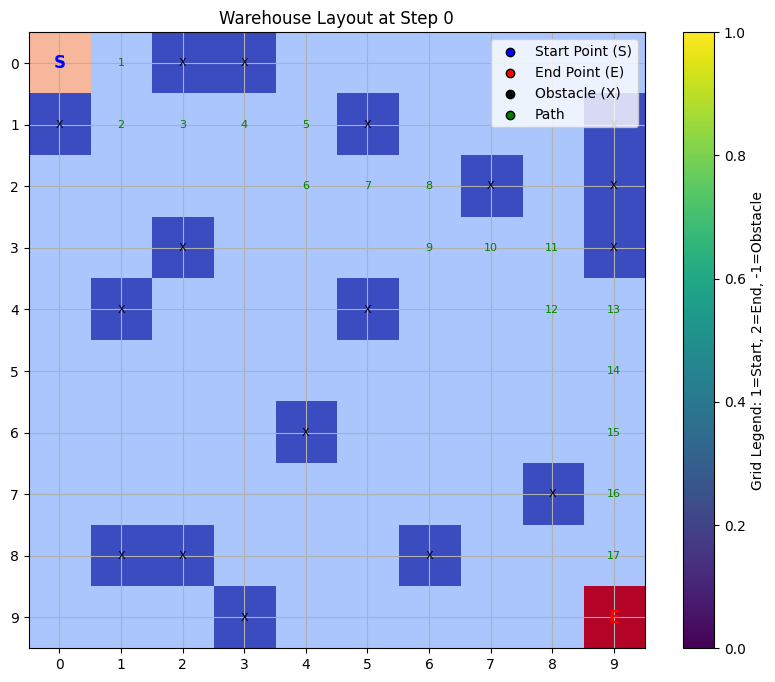

Step 2:


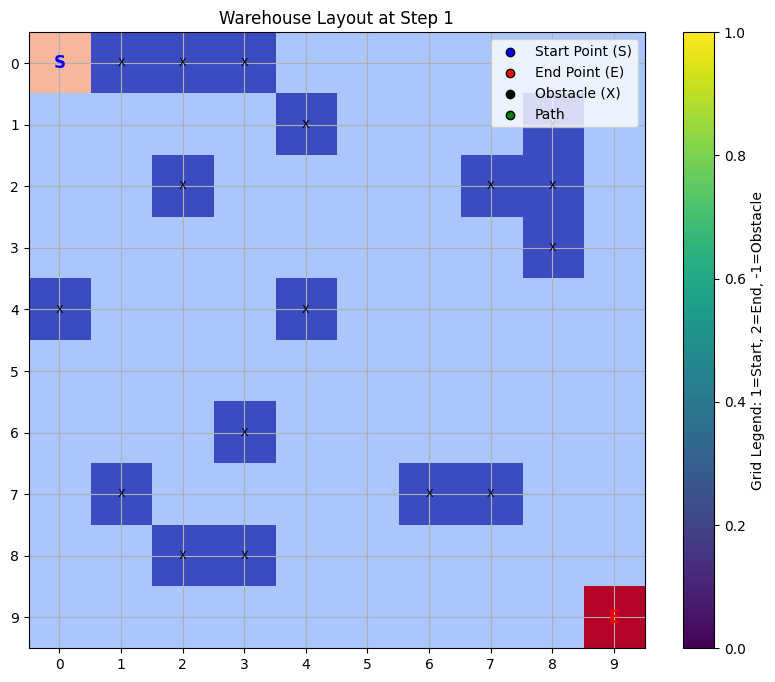

Path: [(1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (3, 7), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


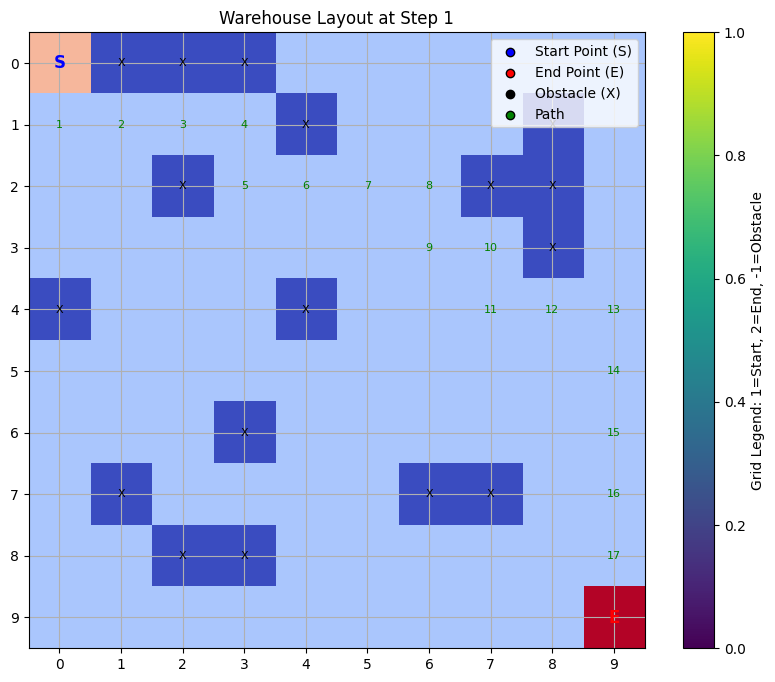

Step 3:


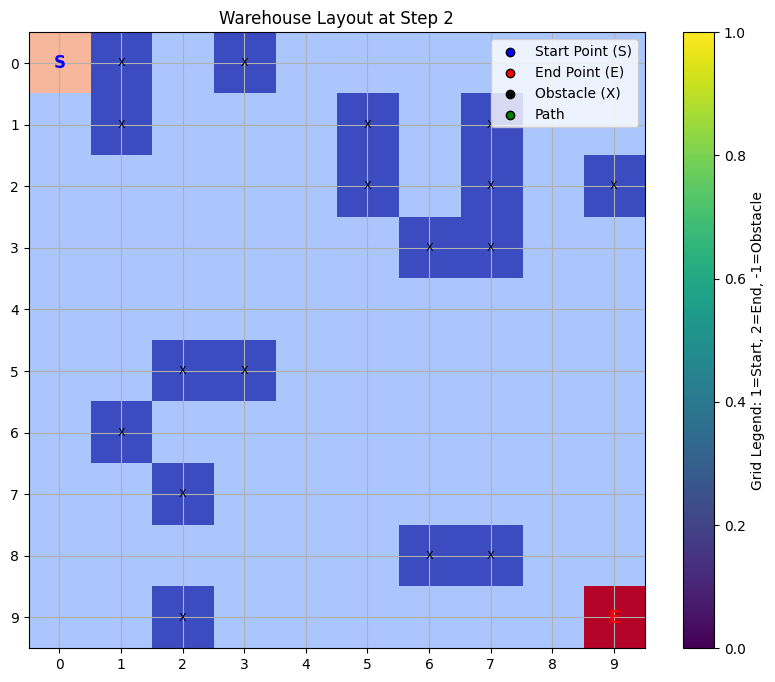

Path: [(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


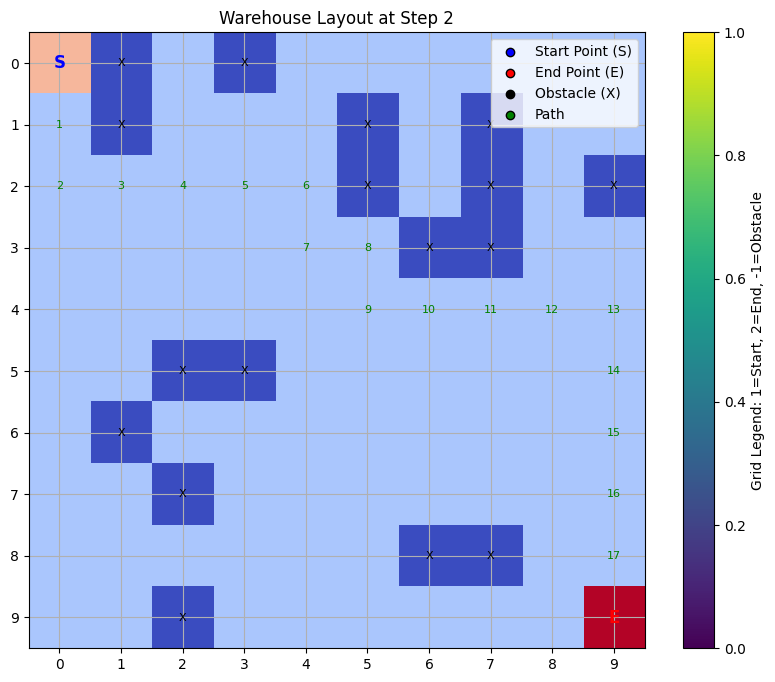

Step 4:


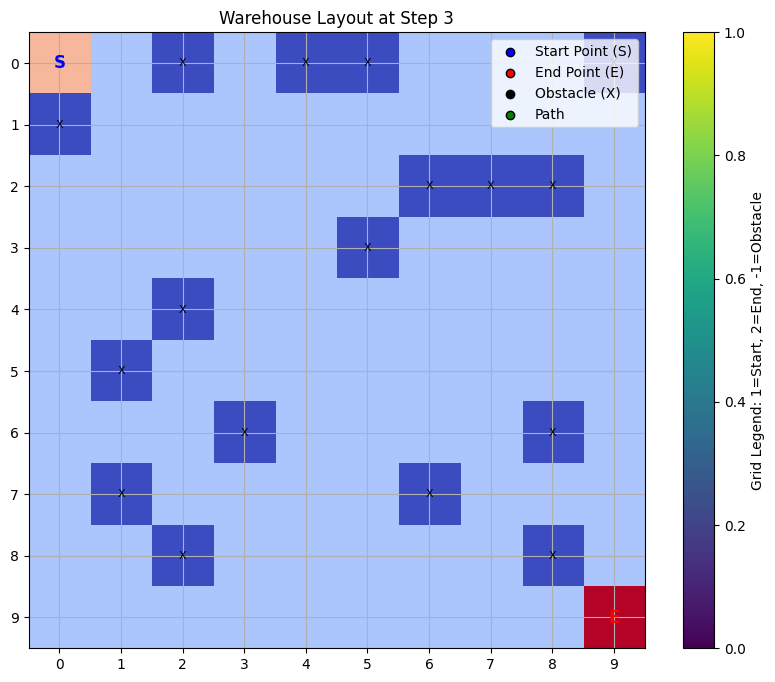

Path: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


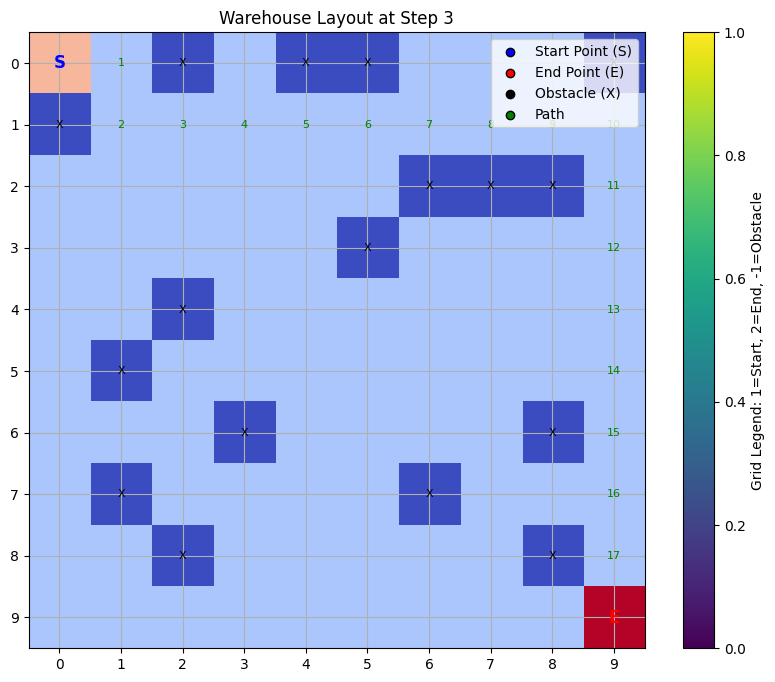

Step 5:


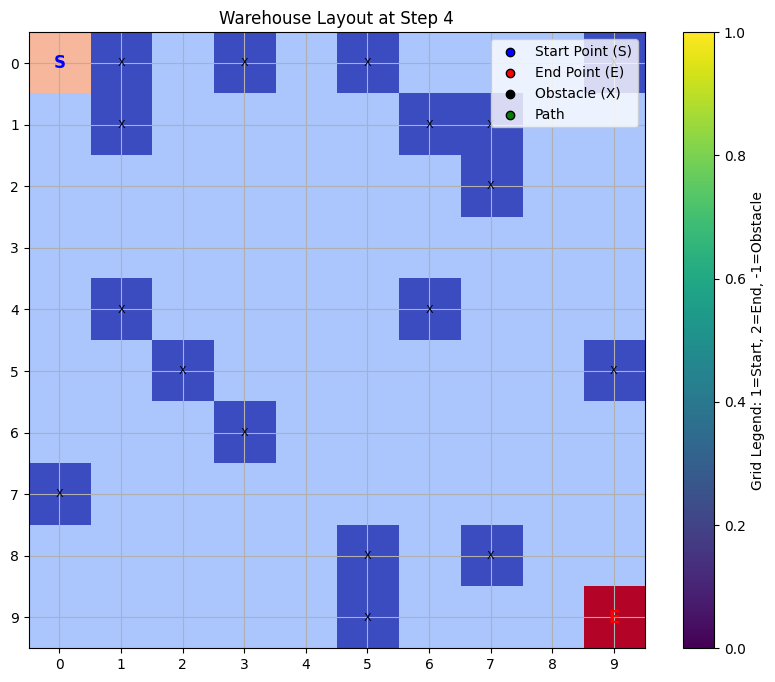

Path: [(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)]


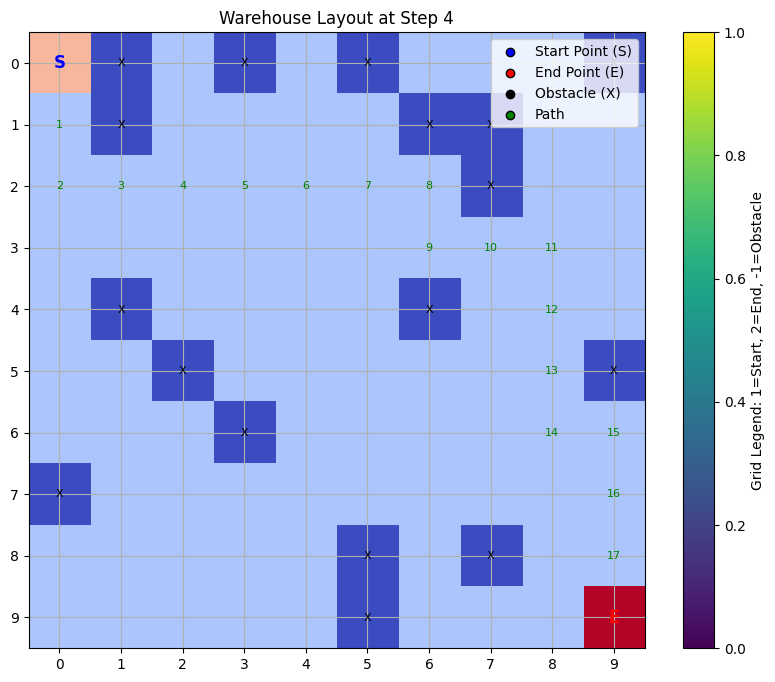

Step 6:


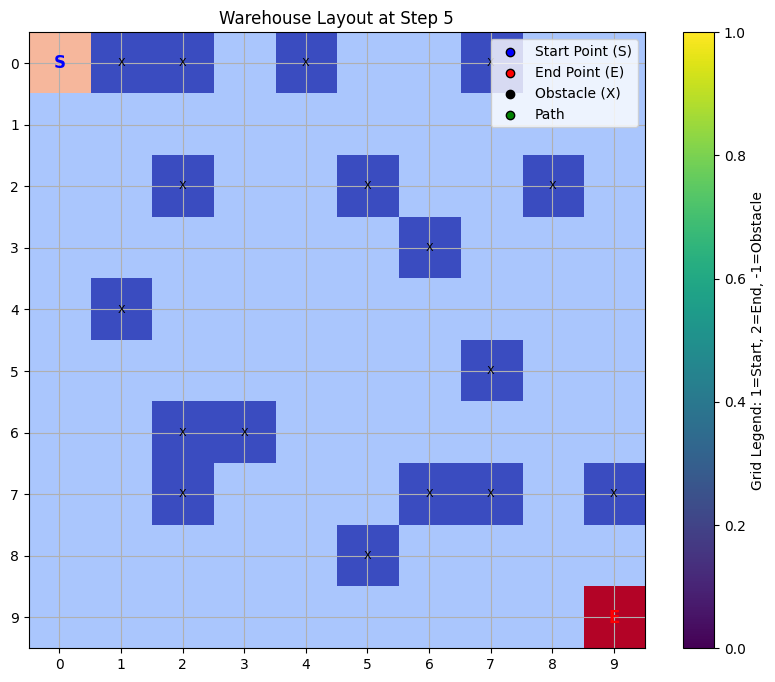

Path: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (8, 9), (9, 9)]


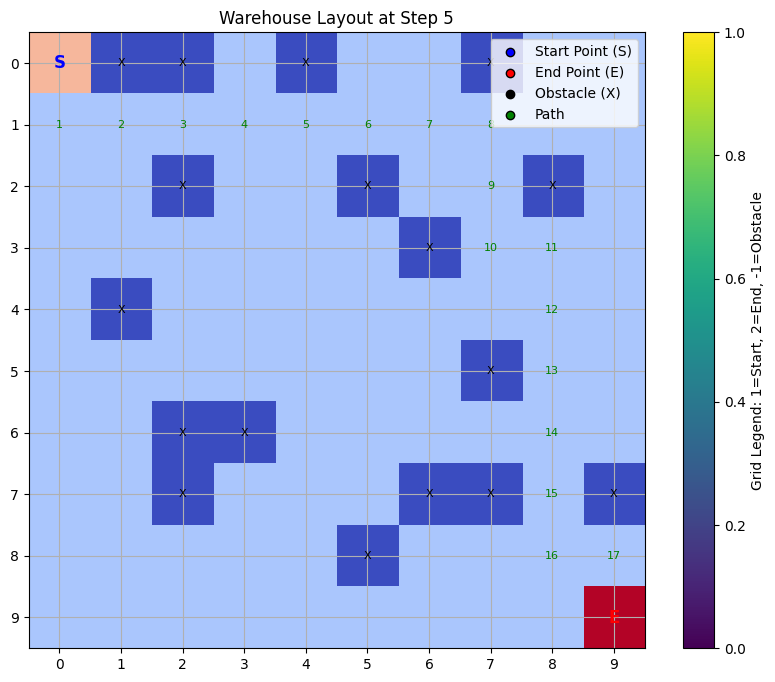

Step 7:


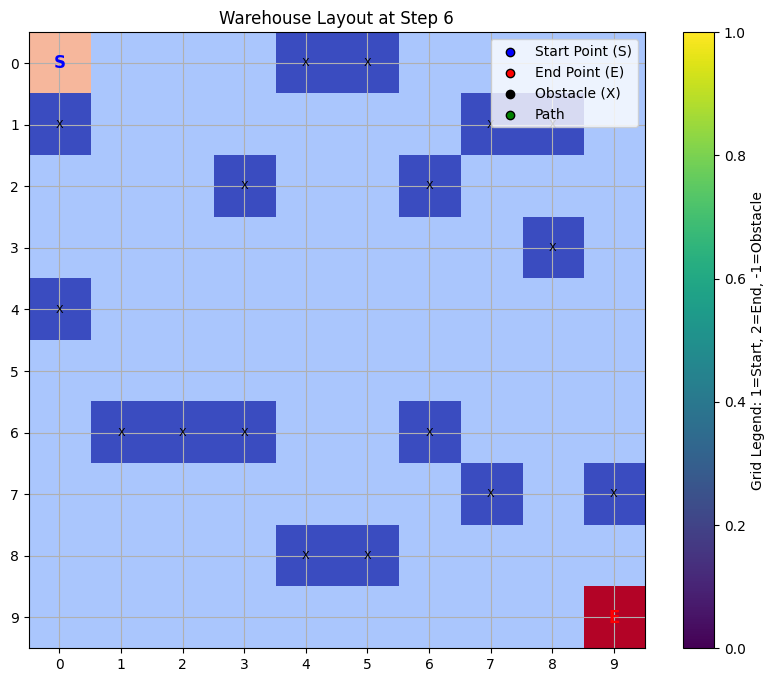

Path: [(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (8, 9), (9, 9)]


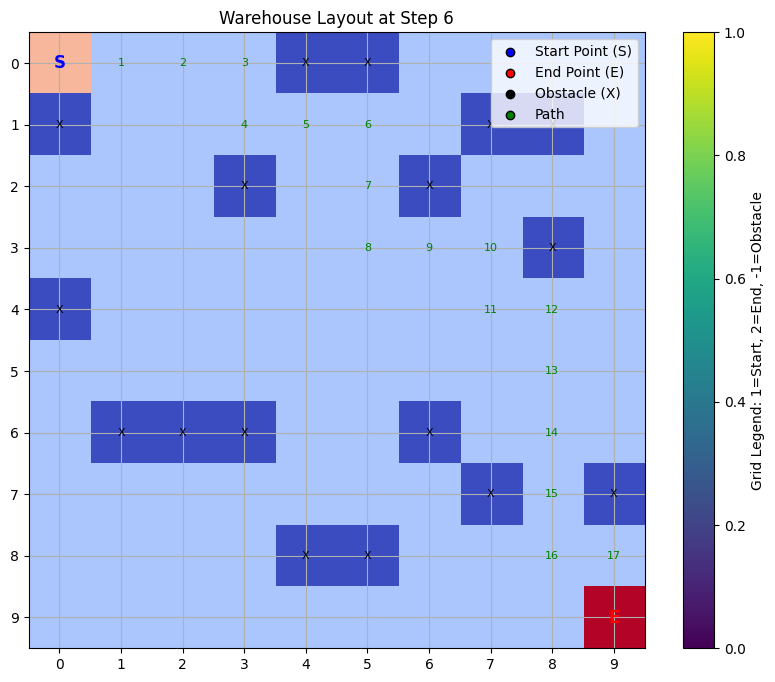

Step 8:


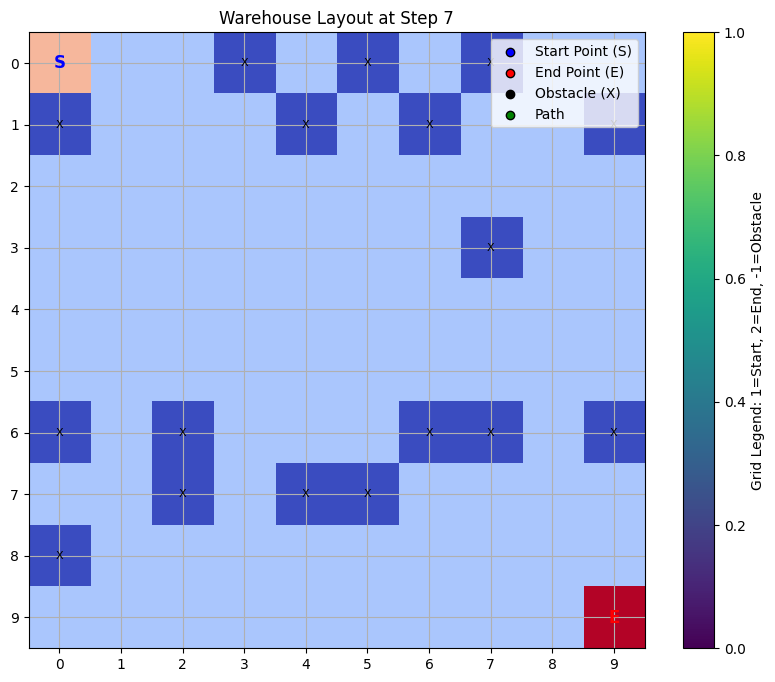

Path: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]


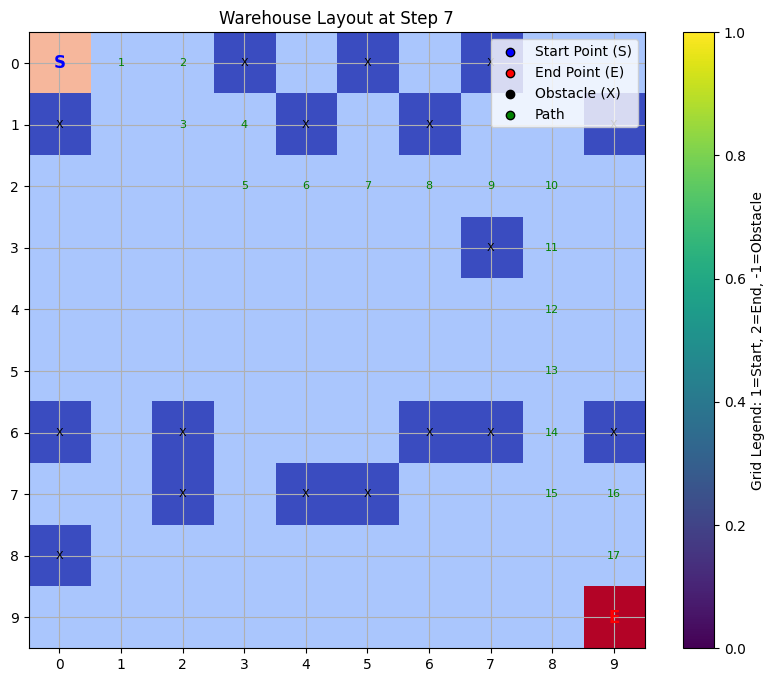

Step 9:


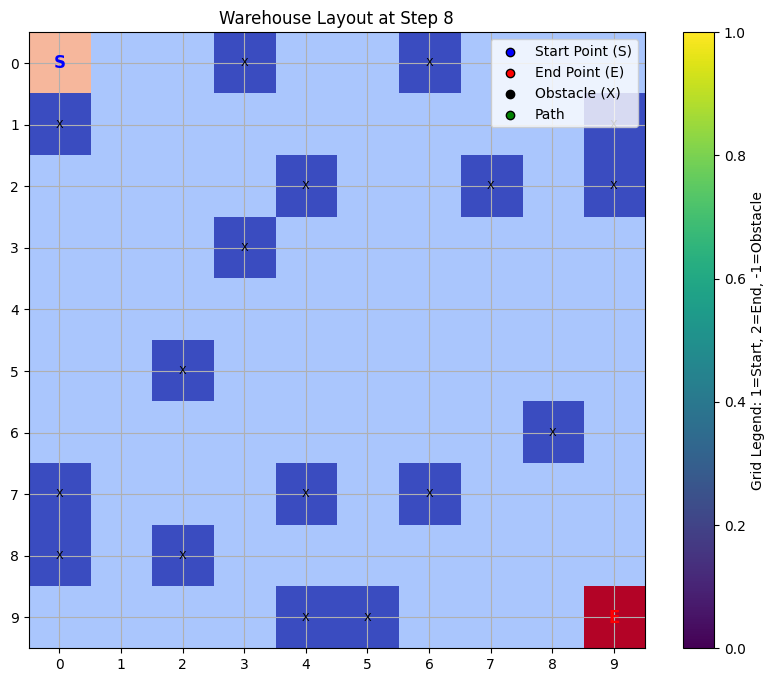

Path: [(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


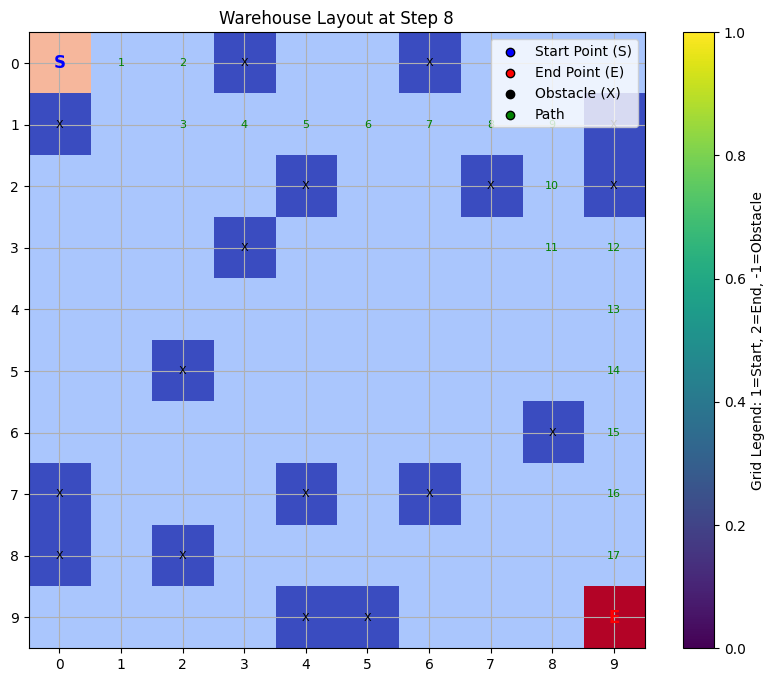

Step 10:


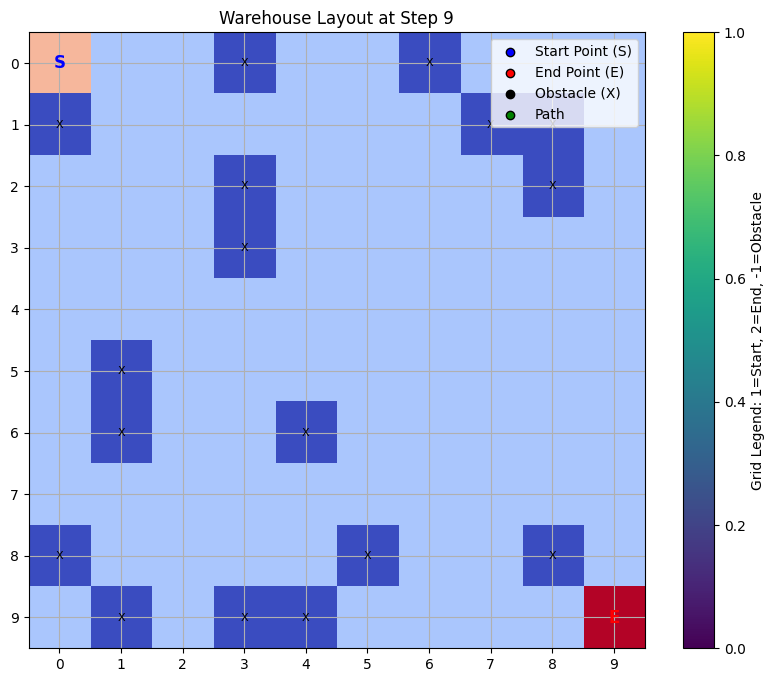

Path: [(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7), (3, 7), (3, 8), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


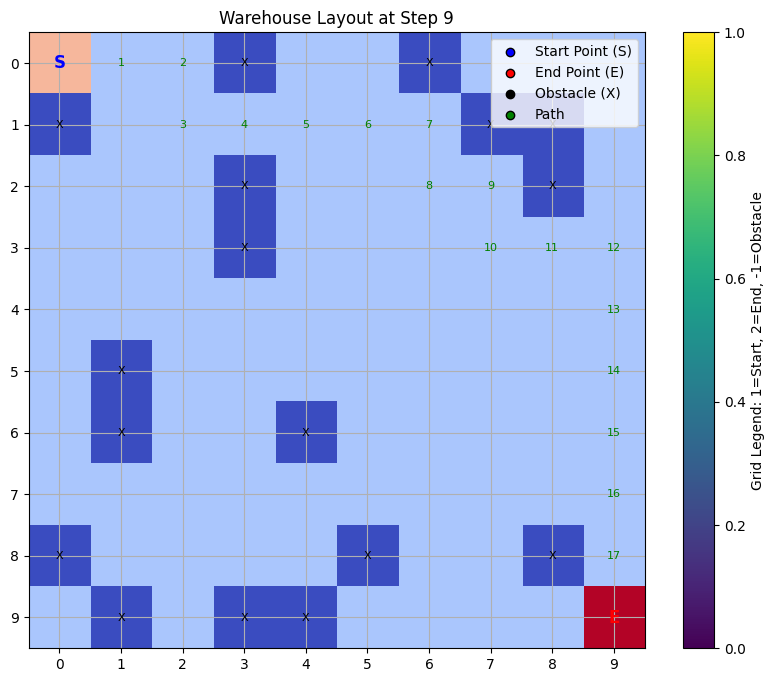

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
import heapq
import time

def generate_warehouse(rows, cols, obstacle_ratio=0.2):
    """Generates a warehouse grid with obstacles."""
    grid = [['.' for _ in range(cols)] for _ in range(rows)]
    num_obstacles = int(rows * cols * obstacle_ratio)
    for _ in range(num_obstacles):
        r, c = random.randint(0, rows-1), random.randint(0, cols-1)
        grid[r][c] = 'X'
    start = (0, 0)
    end = (rows-1, cols-1)
    grid[start[0]][start[1]] = 'S'
    grid[end[0]][end[1]] = 'E'
    return grid, start, end

def visualize_warehouse(grid, path=None, step=None):
    """Visualizes the warehouse grid with detailed annotations."""
    plt.figure(figsize=(10, 8))
    rows, cols = len(grid), len(grid[0])
    matrix = np.zeros((rows, cols))
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'X':
                matrix[r][c] = -1  # Obstacles
            elif grid[r][c] == 'S':
                matrix[r][c] = 1  # Start
            elif grid[r][c] == 'E':
                matrix[r][c] = 2  # End

    plt.imshow(matrix, cmap='coolwarm', origin='upper')
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(visible=True)

    # Add annotations for the grid
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'S':
                plt.text(c, r, 'S', ha='center', va='center', color='blue', fontsize=12, fontweight='bold')
            elif grid[r][c] == 'E':
                plt.text(c, r, 'E', ha='center', va='center', color='red', fontsize=12, fontweight='bold')
            elif grid[r][c] == 'X':
                plt.text(c, r, 'X', ha='center', va='center', color='black', fontsize=8)

    # Plot the path
    if path:
        for idx, (r, c) in enumerate(path):
            if grid[r][c] not in ('S', 'E'):
                plt.text(c, r, f'{idx + 1}', ha='center', va='center', color='green', fontsize=8)

    # Add a legend
    plt.scatter([], [], color='blue', label='Start Point (S)', edgecolors='black')
    plt.scatter([], [], color='red', label='End Point (E)', edgecolors='black')
    plt.scatter([], [], color='black', label='Obstacle (X)', edgecolors='black')
    plt.scatter([], [], color='green', label='Path', edgecolors='black')

    plt.legend(loc='upper right')
    title = f"Warehouse Layout at Step {step}" if step is not None else "Warehouse Layout"
    plt.title(title)
    plt.colorbar(label='Grid Legend: 1=Start, 2=End, -1=Obstacle')
    plt.show()

def a_star(grid, start, end):
    rows, cols = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == end:
            return reconstruct_path(came_from, current)
        for neighbor in get_neighbors(current, grid):
            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, end)
                if neighbor not in [item[1] for item in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return []

def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

def heuristic(pos, goal):
    """Manhattan distance heuristic."""
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

def get_neighbors(pos, grid):
    """Get valid neighboring cells."""
    rows, cols = len(grid), len(grid[0])
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    neighbors = []
    for dr, dc in directions:
        r, c = pos[0] + dr, pos[1] + dc
        if 0 <= r < rows and 0 <= c < cols and grid[r][c] != 'X':
            neighbors.append((r, c))
    return neighbors

def move_obstacles(grid):
    """Simulates movement of obstacles in the grid."""
    rows, cols = len(grid), len(grid[0])
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'X':
                # Randomly move obstacle to a neighboring cell
                directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
                random.shuffle(directions)
                for dr, dc in directions:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == '.':
                        grid[nr][nc], grid[r][c] = grid[r][c], grid[nr][nc]
                        break

# Generate dynamic warehouse
rows, cols = 10, 10
warehouse, start, end = generate_warehouse(rows, cols)

# Dynamic simulation with A*
for step in range(10):  # Simulate 10 steps
    print(f"Step {step + 1}:")
    visualize_warehouse(warehouse, step=step)
    path = a_star(warehouse, start, end)
    if not path:
        print("Path not found!")
        break
    print(f"Path: {path}")
    visualize_warehouse(warehouse, path=path, step=step)
    move_obstacles(warehouse)
    time.sleep(1)  # Pause for visualization


### `3. Hard Level: A* Algorithm And Reinforcement Learning`

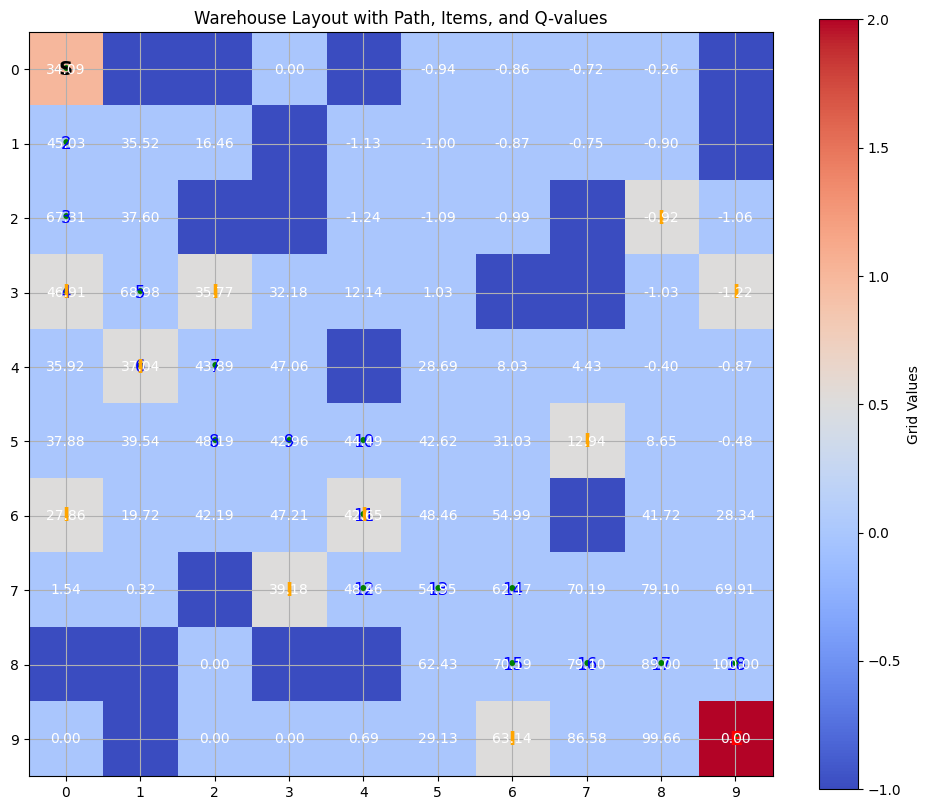

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Utility Functions
def generate_warehouse(rows, cols, obstacle_ratio=0.2, item_ratio=0.1):
    """Generates a warehouse grid with obstacles and items to pick up."""
    grid = [['.' for _ in range(cols)] for _ in range(rows)]
    num_obstacles = int(rows * cols * obstacle_ratio)
    for _ in range(num_obstacles):
        r, c = random.randint(0, rows - 1), random.randint(0, cols - 1)
        grid[r][c] = 'X'  # Place obstacles

    # Define start and end positions
    start = (0, 0)
    end = (rows - 1, cols - 1)
    grid[start[0]][start[1]] = 'S'  # Start point
    grid[end[0]][end[1]] = 'E'  # End point

    # Place items randomly
    num_items = int(rows * cols * item_ratio)
    items = set()
    while len(items) < num_items:
        r, c = random.randint(0, rows - 1), random.randint(0, cols - 1)
        if grid[r][c] == '.' and (r, c) != start and (r, c) != end:
            grid[r][c] = 'I'  # Item to pick up
            items.add((r, c))

    return grid, start, end, items

def visualize_warehouse(grid, path=None, q_values=None, items=None):
    """Visualizes the warehouse grid with path, items, and Q-values."""
    plt.figure(figsize=(12, 10))
    rows, cols = len(grid), len(grid[0])
    matrix = np.zeros((rows, cols))

    # Map grid values to visual elements
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'X':
                matrix[r][c] = -1  # Obstacles
            elif grid[r][c] == 'S':
                matrix[r][c] = 1  # Start
            elif grid[r][c] == 'E':
                matrix[r][c] = 2  # End
            elif grid[r][c] == 'I':
                matrix[r][c] = 0.5  # Items

    plt.imshow(matrix, cmap='coolwarm', origin='upper')
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(visible=True)

    # Annotate path
    if path:
        for idx, (r, c) in enumerate(path):
            plt.text(c, r, '•', ha='center', va='center', color='green', fontsize=12, fontweight='bold')
            if idx == 0:
                plt.text(c, r, 'S', ha='center', va='center', color='black', fontsize=14, fontweight='bold')  # Start
            elif idx == len(path) - 1:
                plt.text(c, r, 'E', ha='center', va='center', color='red', fontsize=14, fontweight='bold')  # End
            else:
                plt.text(c, r, f'{idx+1}', ha='center', va='center', color='blue', fontsize=12)  # Movement step index

    # Annotate items
    if items:
        for r, c in items:
            plt.text(c, r, 'I', ha='center', va='center', color='orange', fontsize=14, fontweight='bold')

    # Add Q-values (optional)
    if q_values:
        for (r, c), q_value in q_values.items():
            plt.text(c, r, f'{q_value:.2f}', ha='center', va='center', color='white', fontsize=10)

    plt.title("Warehouse Layout with Path, Items, and Q-values")
    plt.colorbar(label='Grid Values')
    plt.show()

# Q-learning Implementation with Pickup Task
def q_learning(grid, start, end, items, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.2):
    rows, cols = len(grid), len(grid[0])
    q_table = {(r, c): np.zeros(4) for r in range(rows) for c in range(cols) if grid[r][c] != 'X'}
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    for _ in range(episodes):
        state = start
        inventory = set()  # Track collected items
        while state != end:
            # Choose action (epsilon-greedy policy)
            if random.uniform(0, 1) < epsilon:
                action_idx = random.choice(range(4))
            else:
                action_idx = np.argmax(q_table[state])
            action = actions[action_idx]

            # Compute next state
            next_state = (state[0] + action[0], state[1] + action[1])
            if not (0 <= next_state[0] < rows and 0 <= next_state[1] < cols) or grid[next_state[0]][next_state[1]] == 'X':
                next_state = state  # Invalid move; stay in place

            # Reward and Q-value update
            reward = -1  # Default penalty for movement
            if next_state in items and next_state not in inventory:
                inventory.add(next_state)
                reward = 50  # Reward for picking up an item
            if next_state == end:
                reward = 100  # Goal state reward

            # Q-value update
            q_table[state][action_idx] += alpha * (reward + gamma * max(q_table[next_state]) - q_table[state][action_idx])

            state = next_state
    return q_table

def find_optimal_path(q_table, start, end):
    state = start
    path = [state]
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    while state != end:
        action_idx = np.argmax(q_table[state])
        next_state = (state[0] + actions[action_idx][0], state[1] + actions[action_idx][1])
        if next_state == state:  # Stuck in place
            break
        path.append(next_state)
        state = next_state
    return path

# Main Execution
rows, cols = 10, 10
warehouse, start, end, items = generate_warehouse(rows, cols)

# Q-learning for optimal pathfinding with item pickups
q_table = q_learning(warehouse, start, end, items, episodes=1000)

# Find optimal path
path = find_optimal_path(q_table, start, end)

# Visualize warehouse with annotated path and items
visualize_warehouse(warehouse, path=path, items=items, q_values={state: max(q_table[state]) for state in q_table})


Running Q-learning...
Episode 1/30
Episode 2/30
Episode 3/30
Episode 4/30
Episode 5/30
Episode 6/30
Episode 7/30
Episode 8/30
Episode 9/30
Episode 10/30
Episode 11/30
Episode 12/30
Episode 13/30
Episode 14/30
Episode 15/30
Episode 16/30
Episode 17/30
Episode 18/30
Episode 19/30
Episode 20/30
Episode 21/30
Episode 22/30
Episode 23/30
Episode 24/30
Episode 25/30
Episode 26/30
Episode 27/30
Episode 28/30
Episode 29/30
Episode 30/30
Finding optimal path...
Next state (0, 1) not found in Q-table


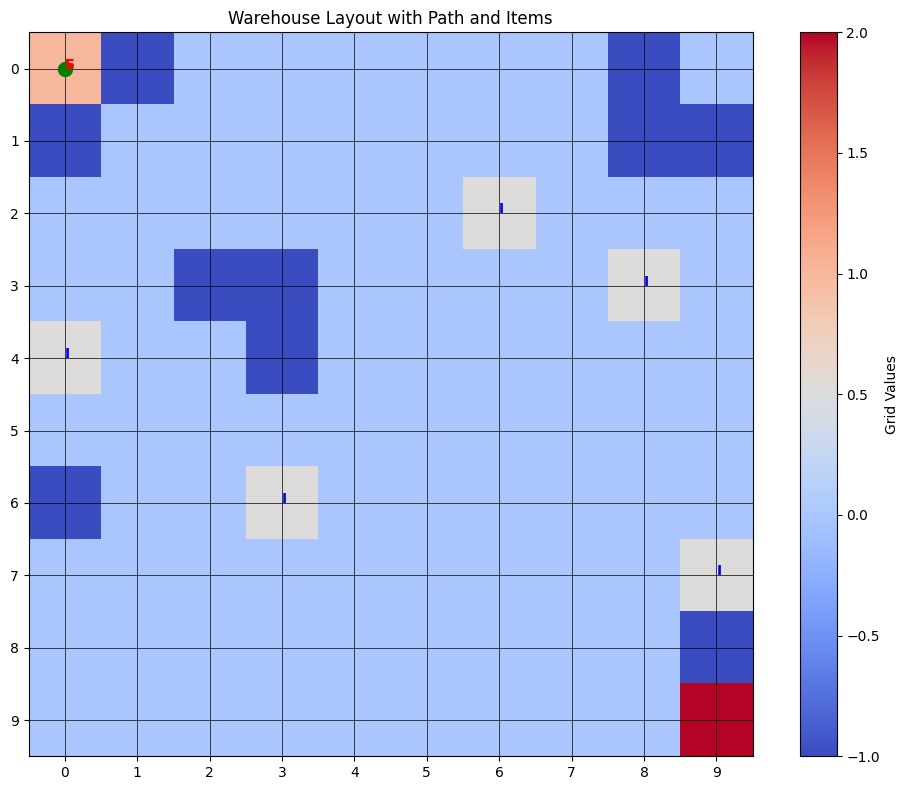

In [27]:
import heapq
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_warehouse(rows, cols, obstacle_ratio=0.1, item_ratio=0.05):
    """Generates a warehouse grid with obstacles and items to pick up."""
    grid = [['.' for _ in range(cols)] for _ in range(rows)]

    # Place obstacles
    num_obstacles = int(rows * cols * obstacle_ratio)
    obstacle_positions = set()
    while len(obstacle_positions) < num_obstacles:
        r, c = random.randint(0, rows - 1), random.randint(0, cols - 1)
        if (r, c) not in obstacle_positions:
            grid[r][c] = 'X'
            obstacle_positions.add((r, c))

    # Define start and end positions
    start = (0, 0)
    end = (rows - 1, cols - 1)
    grid[start[0]][start[1]] = 'S'  # Start point
    grid[end[0]][end[1]] = 'E'  # End point

    # Place items randomly
    num_items = int(rows * cols * item_ratio)
    items = set()
    while len(items) < num_items:
        r, c = random.randint(0, rows - 1), random.randint(0, cols - 1)
        if grid[r][c] == '.' and (r, c) not in {start, end}:
            grid[r][c] = 'I'  # Item to pick up
            items.add((r, c))

    return grid, start, end, items

def a_star(grid, start, items):
    """Finds the optimal path using A* to the closest item."""
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def neighbors(state):
        x, y = state
        possible_moves = [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]
        return [(nx, ny) for nx, ny in possible_moves
                if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != 'X']

    if not items:
        return None

    closest_item = min(items, key=lambda item: heuristic(start, item))

    open_list = [(heuristic(start, closest_item), 0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_list:
        _, current_g, current = heapq.heappop(open_list)

        if current == closest_item:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor in neighbors(current):
            tentative_g_score = current_g + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, closest_item)
                heapq.heappush(open_list, (f_score, tentative_g_score, neighbor))
                came_from[neighbor] = current

    return None

def q_learning_with_astar(grid, start, end, items, episodes=50, alpha=0.1, gamma=0.9, epsilon=0.2):
    rows, cols = len(grid), len(grid[0])

    # Ensure all walkable states are in the Q-table
    q_table = {}
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] != 'X':
                q_table[(r, c)] = np.zeros(4)

    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    for episode in range(episodes):
        state = start
        inventory = set()
        remaining_items = items.copy()

        print(f"Episode {episode + 1}/{episodes}")

        while remaining_items and state != end:
            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action_idx = random.choice(range(4))
            else:
                action_idx = np.argmax(q_table[state])

            action = actions[action_idx]

            # A* to find path to closest item
            path = a_star(grid, state, remaining_items)

            if not path:
                break

            # Move to next state
            next_state = path[1] if len(path) > 1 else state

            # Reward calculation
            reward = -1  # Movement penalty
            if next_state in remaining_items:
                remaining_items.remove(next_state)
                reward = 50  # Item pickup reward

            if next_state == end:
                reward = 100  # Goal reached reward

            # Q-value update
            q_table[state][action_idx] += alpha * (reward + gamma * max(q_table[next_state]) - q_table[state][action_idx])

            state = next_state

    return q_table

def find_optimal_path(q_table, start, end):
    state = start
    path = [state]
    actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    max_steps = 100  # Prevent infinite loops
    while state != end and len(path) < max_steps:
        # Check if the current state exists in q_table
        if state not in q_table:
            print(f"State {state} not found in Q-table")
            break

        action_idx = np.argmax(q_table[state])
        next_state = (state[0] + actions[action_idx][0], state[1] + actions[action_idx][1])

        if next_state == state:  # Stuck
            break

        # Additional check to ensure next_state is valid
        if next_state not in q_table:
            print(f"Next state {next_state} not found in Q-table")
            break

        path.append(next_state)
        state = next_state

    return path

def visualize_warehouse(grid, path=None, items=None):
    plt.figure(figsize=(10, 8))
    rows, cols = len(grid), len(grid[0])
    matrix = np.zeros((rows, cols))

    # Map grid values
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 'X':
                matrix[r][c] = -1  # Obstacles
            elif grid[r][c] == 'S':
                matrix[r][c] = 1  # Start
            elif grid[r][c] == 'E':
                matrix[r][c] = 2  # End
            elif grid[r][c] == 'I':
                matrix[r][c] = 0.5  # Items

    plt.imshow(matrix, cmap='coolwarm', origin='upper')
    plt.colorbar(label='Grid Values')
    plt.title("Warehouse Layout with Path and Items")
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(True, color='black', linewidth=0.5)

    # Path visualization
    if path:
        x_coords = [p[1] for p in path]
        y_coords = [p[0] for p in path]
        plt.plot(x_coords, y_coords, 'go-', linewidth=2, markersize=10)
        plt.text(x_coords[0], y_coords[0], 'S', color='red', fontweight='bold')
        plt.text(x_coords[-1], y_coords[-1], 'E', color='red', fontweight='bold')

    # Items visualization
    if items:
        for r, c in items:
            plt.text(c, r, 'I', color='blue', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Main Execution
def main():
    # Smaller grid for faster execution
    rows, cols = 10, 10

    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)

    # Generate warehouse
    warehouse, start, end, items = generate_warehouse(rows, cols)

    # Q-learning with A* for pathfinding
    print("Running Q-learning...")
    q_table = q_learning_with_astar(warehouse, start, end, items, episodes=30)

    # Find optimal path
    print("Finding optimal path...")
    path = find_optimal_path(q_table, start, end)

    # Visualize results
    visualize_warehouse(warehouse, path=path, items=items)

if __name__ == "__main__":
    main()